In [1]:
#https://spandan-madan.github.io/DeepLearningProject/

In [13]:
#multi modal classification means multi media
!pip install seaborn

In [2]:
import urllib.request as request
import requests
import json
import imdb
import time
import itertools
import wget
import os
import tmdbsimple as tmdb
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

In [3]:
poster_folder='posters_final/'
if poster_folder.split('/')[0] in os.listdir('./'):
    print('Folder already exists')
else:
    os.mkdir('./'+poster_folder)

Folder already exists


In [16]:
poster_folder

'posters_final/'

In [4]:
api_key = 'c769e5077c9ef3c8e17a34aef32bfe7c'
tmdb.API_KEY = api_key
search = tmdb.Search()

def grab_poster_tmdb(movie):
    response = search.movie(query=movie)
    id = response['results'][0]['id']
    movie = tmdb.Movies(id)
    posterp = movie.info()['poster_path']
    title = movie.info()['original_title']
    url = 'image.tmdb.org/t/p/original'+ posterp
    title = '_'.join(title.split(' '))
    strcmd = 'wget -O'+ poster_folder+title+'.jpg '+url
    os.system(strcmd)


In [5]:
def get_movie_id_tmdb(movie):
    response = search.movie(query=movie)
    movie_id=response['results'][0]['id']
    return movie_id

In [6]:
def get_movie_info_tmdb(movie):
    response=search.movie(query=movie)
    id=response['results'][0]['id']
    movie = tmdb.Movies(id)
    info = movie.info()
    return info
    

In [7]:
def get_movie_genres_tmdb(movie):
    response = search.movie(query=movie)
    id=response['results'][0]['id']
    movie = tmdb.Movies(id)
    genres=movie.info()['genres']
    return genres

In [8]:
print(get_movie_genres_tmdb("Interstellar"))

[{'id': 12, 'name': 'Adventure'}, {'id': 18, 'name': 'Drama'}, {'id': 878, 'name': 'Science Fiction'}]


In [9]:
info=get_movie_info_tmdb("The Matrix")

In [10]:
def get_adult(movie):
    response = search.movie(query=movie)
    id = response['results'][0]['id']
    movie = tmdb.Movies(id)
    adult=movie.info()['adult']
    return adult

In [12]:
print(get_adult("Interstellar"))

False


In [11]:
print(get_movie_info_tmdb("Interstellar"))

{'adult': False, 'backdrop_path': '/xu9zaAevzQ5nnrsXN6JcahLnG4i.jpg', 'belongs_to_collection': None, 'budget': 165000000, 'genres': [{'id': 12, 'name': 'Adventure'}, {'id': 18, 'name': 'Drama'}, {'id': 878, 'name': 'Science Fiction'}], 'homepage': 'http://www.interstellarmovie.net/', 'id': 157336, 'imdb_id': 'tt0816692', 'original_language': 'en', 'original_title': 'Interstellar', 'overview': 'Interstellar chronicles the adventures of a group of explorers who make use of a newly discovered wormhole to surpass the limitations on human space travel and conquer the vast distances involved in an interstellar voyage.', 'popularity': 53.448, 'poster_path': '/nBNZadXqJSdt05SHLqgT0HuC5Gm.jpg', 'production_companies': [{'id': 923, 'logo_path': '/5UQsZrfbfG2dYJbx8DxfoTr2Bvu.png', 'name': 'Legendary Entertainment', 'origin_country': 'US'}, {'id': 9996, 'logo_path': '/3tvBqYsBhxWeHlu62SIJ1el93O7.png', 'name': 'Syncopy', 'origin_country': 'GB'}, {'id': 13769, 'logo_path': None, 'name': 'Lynda Obst 

In [13]:
# getting information from imdb

imdb_object = imdb.IMDb()

results = imdb_object.search_movie('The Matrix')

movie = results[0]

imdb_object.update(movie)

print("All the information we can get about this movie from IMDb")
movie.keys()

All the information we can get about this movie from IMDb


['title',
 'kind',
 'year',
 'cover url',
 'cast',
 'genres',
 'runtimes',
 'countries',
 'country codes',
 'language codes',
 'color info',
 'aspect ratio',
 'sound mix',
 'box office',
 'certificates',
 'original air date',
 'rating',
 'votes',
 'plot outline',
 'languages',
 'directors',
 'writers',
 'producers',
 'composers',
 'cinematographers',
 'editors',
 'editorial department',
 'casting directors',
 'production designers',
 'art directors',
 'set decorators',
 'costume designers',
 'make up department',
 'production managers',
 'assistant directors',
 'art department',
 'sound department',
 'special effects',
 'visual effects',
 'stunts',
 'camera department',
 'animation department',
 'casting department',
 'costume departmen',
 'location management',
 'music department',
 'script department',
 'transportation department',
 'miscellaneous',
 'akas',
 'writer',
 'director',
 'top 250 rank',
 'production companies',
 'distributors',
 'special effects companies',
 'other compan

In [14]:
#small comparison withimdb and tmdb
print(get_movie_genres_tmdb("Interstellar"))
print(movie['genres'])

[{'id': 12, 'name': 'Adventure'}, {'id': 18, 'name': 'Drama'}, {'id': 878, 'name': 'Science Fiction'}]
['Action', 'Sci-Fi']


In [15]:
all_movies = tmdb.Movies()
top_movies = all_movies.popular()

print(len(top_movies))

top20_movs=top_movies['results']

4


In [16]:
first_movie = top20_movs[0]
print("Here is all the information you can get on this movie - ")
print(first_movie)
print("\n\nThe title of first movie is ", first_movie['title'])

Here is all the information you can get on this movie - 
{'popularity': 379.049, 'vote_count': 2099, 'video': False, 'poster_path': '/xBHvZcjRiWyobQ9kxBhO6B2dtRI.jpg', 'id': 419704, 'adult': False, 'backdrop_path': '/5BwqwxMEjeFtdknRV792Svo0K1v.jpg', 'original_language': 'en', 'original_title': 'Ad Astra', 'genre_ids': [12, 18, 9648, 878, 53], 'title': 'Ad Astra', 'vote_average': 6, 'overview': 'The near future, a time when both hope and hardships drive humanity to look to the stars and beyond. While a mysterious phenomenon menaces to destroy life on planet Earth, astronaut Roy McBride undertakes a mission across the immensity of space and its many perils to uncover the truth about a lost expedition that decades before boldly faced emptiness and silence in search of the unknown.', 'release_date': '2019-09-17'}


The title of first movie is  Ad Astra


In [17]:
for i in range(len(top20_movs)):
    mov = top20_movs[i]
    genres = mov['genre_ids']
    print(genres)
    if i == 4:
        break

[12, 18, 9648, 878, 53]
[28, 18, 36, 10752]
[28, 80, 53]
[80, 18, 53]
[18, 14, 27]


In [47]:
#genres functionality has been changed

genres = tmdb.Genres()
for i in tmdb.__dict__:
    print(i)
#list_of_genres = genres.list()['genres']

print(genres.__dict__)

__name__
__doc__
__package__
__loader__
__spec__
__path__
__file__
__cached__
__builtins__
__title__
__version__
__author__
__copyright__
__license__
os
base
account
Account
Authentication
GuestSessions
Lists
APIKeyError
changes
Changes
configuration
Configuration
Certifications
Timezones
discover
Discover
find
Find
genres
Genres
movies
Movies
Collections
Companies
Keywords
Reviews
people
People
Credits
Jobs
search
Search
tv
TV
TV_Seasons
TV_Episodes
Networks
API_KEY
API_VERSION
{'base_uri': 'https://api.themoviedb.org/3', 'id': 0}


In [46]:


Genre_ID_to_name={}
# for i in range(len(list_of_genres)):
#     genre_id=list_of_genres[i]['id']
#     genre_name=list_of_genres[i]['name']
#     Genre_ID_to_name[genre_id]=genre_name



In [37]:
all_movies = tmdb.Movies()
top_movies = all_movies.popular()

print(len(top_movies['results']))
top20_movs = top_movies['results']

20


all_movies = tmdb.Movies()
top1000_movies = []
print("Pulling movie list, please wait ... ")
for i in range(1,51):
    if(i%15 == 0):
        time.sleep(7)
    movies_on_this_page = all_movies.popular(page=i)['results']
    top1000_movies.extend(movies_on_this_page)

len(top1000_movies)
f3 = open('movie_list.pckl','wb')
pickle.dump(top1000_movies, f3)
f3.close()
print('Done !')

In [39]:
f3 = open('movie_list.pckl', 'rb')
top1000_movies = pickle.load(f3)

In [40]:
def list2pairs(l):
    pairs = list(itertools.combinations(l,2))
    
    for i in l:
        pairs.append([i,i])
    return pairs

In [42]:
allPairs = []

for movie in top1000_movies:
    allPairs.extend(list2pairs(movie['genre_ids']))
    
nr_ids = np.unique(allPairs)
visGrid = np.zeros((len(nr_ids), len(nr_ids)))

for p in allPairs:
    visGrid[np.argwhere(nr_ids == p[0]), np.argwhere(nr_ids == p[1])] += 1
    if p[1] != p[0]:
        visGrid[np.argwhere(nr_ids==p[1]), np.argwhere(nr_ids == p[0])] += 1

In [43]:
print(visGrid.shape)
print(len(Genre_ID_to_name.keys()))

(19, 19)
0


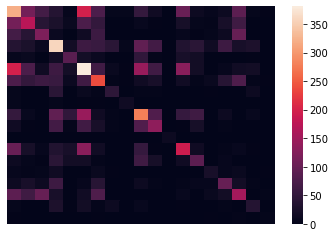

In [50]:
annot_lookup = []
# for i in range(len(nr_ids)):
#     annot_lookup.append(Genre_ID_to_name[nr_ids[i]])

sns.heatmap(visGrid, xticklabels=annot_lookup, yticklabels=annot_lookup)